In [ ]:
!pip install matplotlib networkx


In [ ]:
!pip install networkx --upgrade


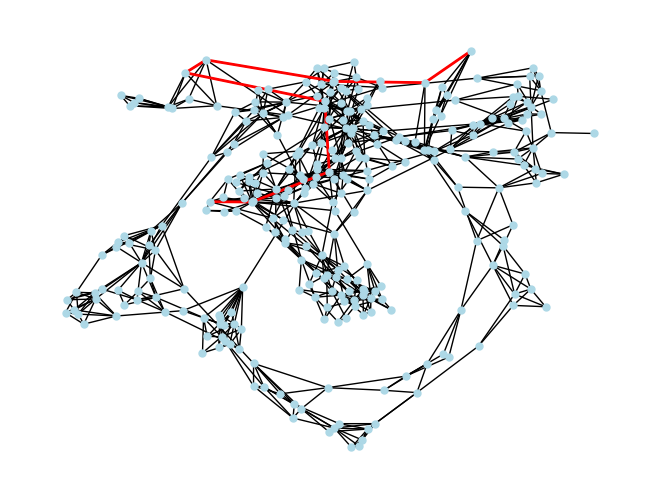

['Chapecó', 'Xaxim', 'Arabutã', 'Água Doce', 'Monte Castelo', 'Rio Negrinho', 'São Bento do Sul', 'Campo Alegre', 'São Francisco do Sul']


In [ ]:
import json
import matplotlib.pyplot as plt
import networkx as nx

def menor_caminho_dijkstra(grafo, origem, destino):
  """
  Função que implementa o algoritmo de Dijkstra para encontrar o menor caminho entre duas cidades.

  Argumentos:
    grafo: Dicionário que representa o grafo, onde as chaves são os nomes das cidades e os valores são dicionários com as distâncias para as cidades adjacentes.
    origem: Nome da cidade de origem.
    destino: Nome da cidade de destino.

  Retorno:
    Lista que representa o menor caminho, começando pela cidade de origem e terminando na cidade de destino.
  """

  # ... (código original do Dijkstra)

  # Criar o grafo NetworkX
  G = nx.Graph()
  G.add_nodes_from(grafo.keys())
  for cidade_atual, vizinhos in grafo.items():
    for vizinha, distancia in vizinhos.items():
      G.add_edge(cidade_atual, vizinha, weight=distancia)

  # Obter o menor caminho
  caminho_nx = nx.shortest_path(G, origem, destino)

  # Converter o caminho para uma lista de nomes de cidades
  caminho = list(caminho_nx)

  return caminho

def mostrar_caminho_com_visualizacao(grafo, caminho):
  """
  Função que exibe o menor caminho usando PyPlot e NetworkX.

  Argumentos:
    grafo: Dicionário que representa o grafo, onde as chaves são os nomes das cidades e os valores são dicionários com as distâncias para as cidades adjacentes.
    caminho: Lista que representa o menor caminho.
  """

  # Criar o grafo NetworkX
  G = nx.Graph()
  G.add_nodes_from(grafo.keys())
  for cidade_atual, vizinhos in grafo.items():
    for vizinha, distancia in vizinhos.items():
      G.add_edge(cidade_atual, vizinha, weight=distancia)

  # Desenhar o grafo (nós e arestas padrão)
  # pos = nx.spring_layout(G, k=0.5)
  # nx.draw(G, pos=pos, with_labels=True, node_size=300, node_color='lightblue', edge_color='black')
  pos = nx.spring_layout(G)
  for node in G.nodes:
    if node in caminho:  # Posicionar pontos do caminho mais afastados
      pos[node] *= 1.2  # Multiplicador para aumentar a distância
    else:
      pos[node] *= 0.8  # Multiplicador para diminuir a distância

  # Desenhar o grafo com a nova posição dos pontos
  nx.draw(G, pos=pos, with_labels=False, node_size=25, node_color='lightblue', edge_color='black')

  # Destacar o menor caminho (usando nx.draw_networkx_edges)
  caminho_edges = list(zip(caminho[:-1], caminho[1:]))
  nx.draw_networkx_edges(G, pos, edgelist=caminho_edges, width=2.0, edge_color='red')

  # Mostrar o grafo
  plt.show()

# Carregar o arquivo JSON com as cidades e distâncias
with open('/content/cidadesSC.json') as f:
    grafo = json.load(f)

# Exemplo de uso
origem = "Chapecó"
destino = "São Francisco do Sul"
caminho = menor_caminho_dijkstra(grafo, origem, destino)
mostrar_caminho_com_visualizacao(grafo, caminho)
print(caminho)